### 1. imports

In [1]:
# install.packages("ggplot2")
library(ggplot2)

### 2. data

In [2]:
data(diamonds)

`-` cut, color, clarity를 범주형(factor)로 변환

In [3]:
diamonds$cut <- factor(diamonds$cut, ordered = FALSE)
diamonds$color <- factor(diamonds$color, ordered = FALSE)
diamonds$clarity <- factor(diamonds$clarity, ordered = FALSE)

`-` 사용할 변수 선택

In [4]:
diamonds_sub <- diamonds[, c("price", "carat", "cut", "color", "clarity", "depth", "table", "x", "y", "z")]

`-` 데이터 셔플

In [6]:
set.seed(2025)  # 재현성 확보
shuffled_idx <- sample(nrow(diamonds_sub))
diamonds_sub <- diamonds_sub[shuffled_idx, ]

`-` 데이터 분할(70% train, 30% test)

In [7]:
n <- nrow(diamonds_sub)
n_train <- round(0.7 * n)

In [8]:
train_data <- diamonds_sub[1:n_train, ]
test_data  <- diamonds_sub[(n_train + 1):n, ]

### 3. 모델 학습

In [9]:
model <- lm(price ~ carat + cut + color + clarity + depth + table + x + y + z, data = train_data)

In [10]:
summary(model)


Call:
lm(formula = price ~ carat + cut + color + clarity + depth + 
    table + x + y + z, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-21193.1   -592.3   -184.2    379.4  10019.2 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2523.821    486.284   5.190 2.11e-07 ***
carat        11166.722     57.804 193.183  < 2e-16 ***
cutGood        569.597     40.501  14.064  < 2e-16 ***
cutVery Good   708.343     38.926  18.197  < 2e-16 ***
cutPremium     752.076     38.947  19.310  < 2e-16 ***
cutIdeal       810.282     40.340  20.086  < 2e-16 ***
colorE        -207.868     21.473  -9.681  < 2e-16 ***
colorF        -253.152     21.671 -11.681  < 2e-16 ***
colorG        -476.298     21.273 -22.390  < 2e-16 ***
colorH        -967.243     22.517 -42.956  < 2e-16 ***
colorI       -1462.027     25.326 -57.728  < 2e-16 ***
colorJ       -2379.519     31.042 -76.655  < 2e-16 ***
claritySI2    2660.652     51.379  51.784  < 2e-16 ***


### 4. 모델 평가

`-` test_set 예측

In [11]:
test_pred <- predict(model, newdata = test_data)

`-` test 성능 평가(RMSE 계산)

In [12]:
test_rmse <- sqrt(mean((test_pred - test_data$price)^2))
cat("Test RMSE:", round(test_rmse, 2), "\n")

Test RMSE: 1132.54 


`-` 예측 vs 실제 산점도 (test set)

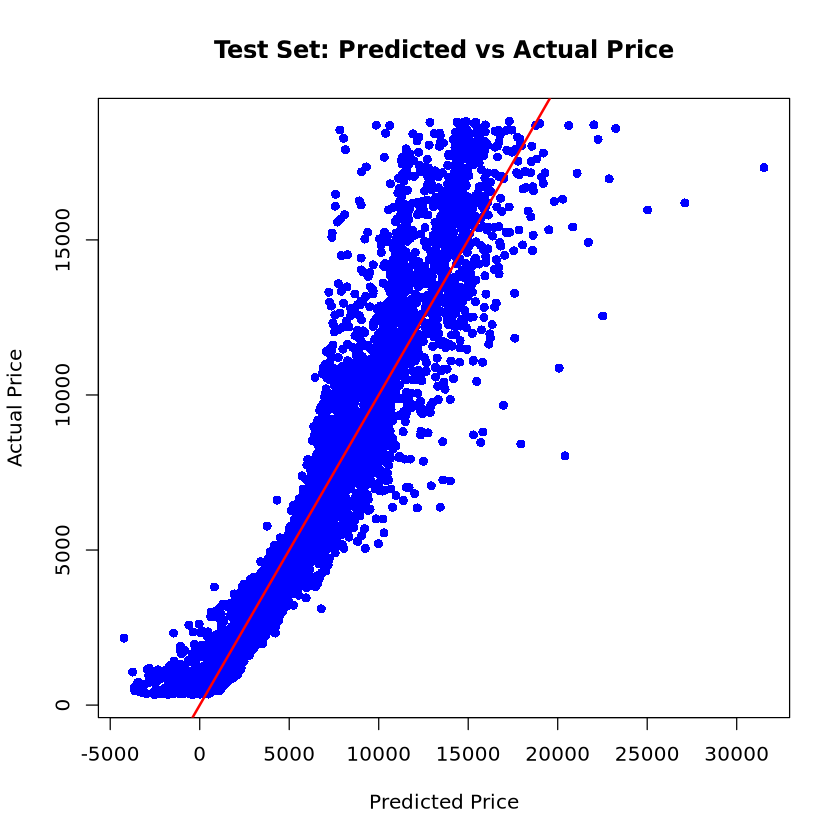

In [13]:
plot(test_pred, test_data$price,
     xlab = "Predicted Price", ylab = "Actual Price",
     main = "Test Set: Predicted vs Actual Price",
     pch = 16, col = "blue")
abline(0, 1, col = "red", lwd = 2)  # 완벽한 예측선 (y = x)

`-` RMSE값 그래프에 추가

In [14]:
text(x = max(test_pred) * 0.7, 
     y = min(test_data$price) * 1.2, 
     labels = paste0("Test RMSE = ", round(test_rmse, 2)),
     pos = 4, 
     col = "black", 
     cex = 0.9)

ERROR: Error in text.default(x = max(test_pred) * 0.7, y = min(test_data$price) * : plot.new has not been called yet


`-` 새로운 데이터 생성

In [15]:
new_data <- data.frame(
  carat = c(0.5, 1.2),
  cut = factor(c("Ideal", "Premium"), levels = levels(diamonds$cut)),
  color = factor(c("E", "H"), levels = levels(diamonds$color)),
  clarity = factor(c("VS2", "SI1"), levels = levels(diamonds$clarity)),
  depth = c(61.5, 62.2),
  table = c(55, 58),
  x = c(5.1, 6.9),
  y = c(5.2, 7.1),
  z = c(3.15, 4.35)
)

`-` 새로운 데이터 예측 및 결과 출력

In [16]:
predicted_prices <- predict(model, newdata = new_data)

In [18]:
new_data$predicted_price <- round(predicted_prices, 2)
new_data

carat,cut,color,clarity,depth,table,x,y,z,predicted_price
<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.5,Ideal,E,VS2,61.5,55,5.1,5.2,3.15,2074.45
1.2,Premium,H,SI1,62.2,58,6.9,7.1,4.35,6541.83
